# Group 3 Jupyter Notebook

## The given task is to populate a graph & do a BFS on it.

### Create and populate our beginning graph:

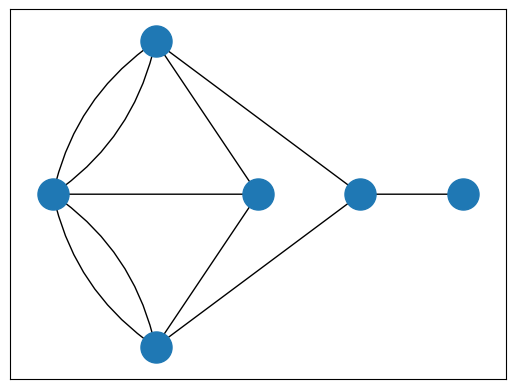

In [107]:
import networkx as nx

G = nx.DiGraph()
G.add_edge("A", "B", label="a")
G.add_edge("B", "A", label="b")
G.add_edge("A", "C", label="c")
G.add_edge("C", "A", label="d")
G.add_edge("A", "D", label="e")
G.add_edge("B", "D", label="f")
G.add_edge("C", "D", label="g")
G.add_edge("C", "E", label="h")
G.add_edge("E", "F", label="i")

positions = {"A": (0, 0), "B": (1, -2), "C": (1, 2), "D": (2, 0), "E": (3, 0), "F": (4, 0)}

nx.draw_networkx_nodes(G, pos=positions, node_size=500)
nx.draw_networkx_edges(
    G, pos=positions, edgelist=[("A", "D"), ("B", "D"), ("C", "D"), ("B", "E"), ("C", "E"), ("E", "F")], arrowstyle="-"
)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=[("A", "B"), ("B", "A"), ("C", "A"), ("A", "C")],
    arrowstyle="-",
    connectionstyle="arc3,rad=0.2",
);

## Lots of edges

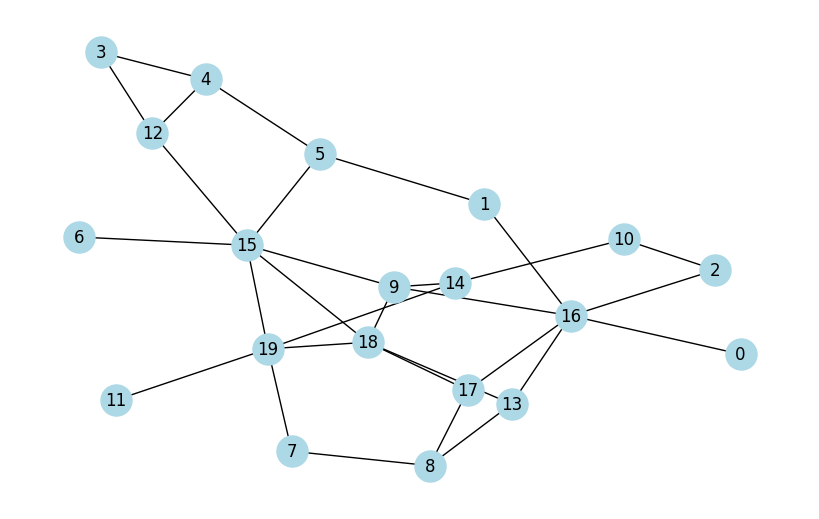

In [110]:
# from itertools import combinations, groupby
import networkx as nx
import random

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

nodes = 20
seed = random.randint(1,10)
probability = 0.1
H = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(H, node_color='lightblue', 
        with_labels=True, 
        node_size=500)# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

### Run a BFS algorithm on the newly-populated graph.

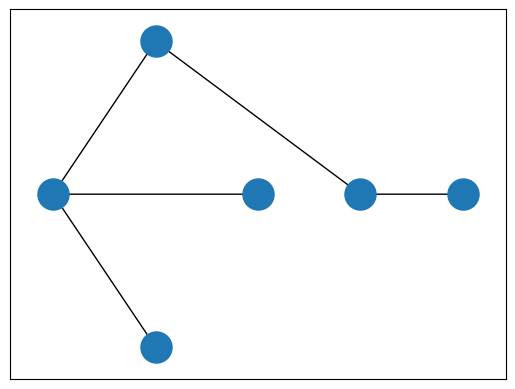

In [111]:
nx.draw_networkx_nodes(G, pos=positions, node_size=500)
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=list(nx.bfs_tree(G, "A").edges()),
    arrowstyle="-",
    label="A"
    # connectionstyle="arc3,rad=0.2",
);

### Running a DFS algorithm

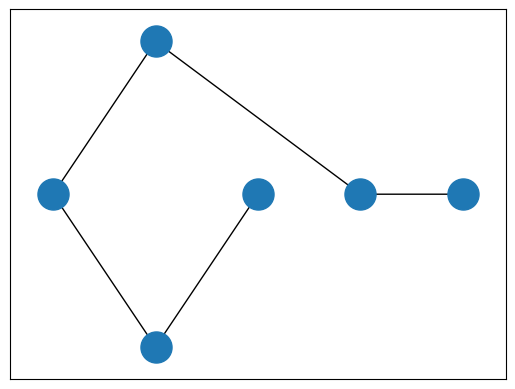

In [ ]:
nx.draw_networkx_nodes(G,
                        pos=positions,
                        node_size=500,
                        );
nx.draw_networkx_edges(
    G,
    pos=positions,
    edgelist=list(nx.dfs_tree(G, "A").edges()),
    arrowstyle="-",
    # connectionstyle="arc3,rad=0.2",
);

### Extra

In [ ]:
print("Shortest path starting from A: ")
print(nx.shortest_path_length(G, "A"))

print(nx.dijkstra_predecessor_and_distance(G, "A"))

print("Graph G defined at the begining is -> " + str(nx.is_bipartite(G)) + " bipartite");


Shortest path starting from A: 
{'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 3}
({'A': [], 'B': ['A'], 'C': ['A'], 'D': ['A'], 'E': ['C'], 'F': ['E']}, {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 2, 'F': 3})
Graph G defined at the begining is -> False bipartite
